# Limb centering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ssi import SSI

## Load Voyager image

In [2]:
img = SSI('IMG/C2060513.pho.cub')
img

<SSI> Cube: C2060513
 - Size: (800, 800)
 - Start time: 1979-07-08 03:04:47.074000
 - Filter name: CLEAR
 - Exposure: 0.12 seconds
 - Main target: Europa
 - Data alignment: False

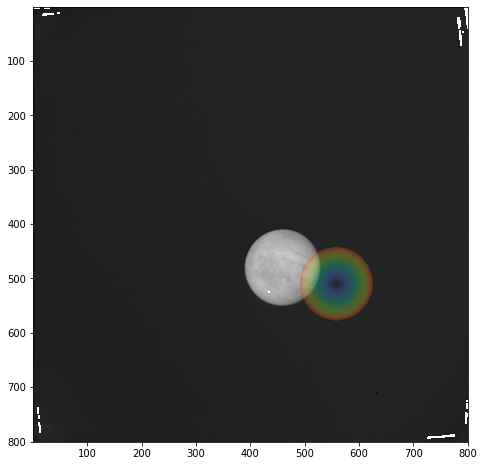

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.imshow(img.data, cmap='gray', extent=img.extent)
ax.imshow(img.emi, cmap='turbo', extent=img.extent, alpha=.3);

## Find the center calculated from the SPICE Kernels

In [4]:
gx = np.nansum(img.ground, axis=0)
gy = np.nansum(img.ground, axis=1)

l = np.argmax(gx > 0) + .5
r = img.NS - np.argmax(gx[::-1] > 0) + .5

t = np.argmax(gy > 0) + .5
b = img.NL - np.argmax(gy[::-1] > 0) + .5

x0, y0 = (r + l) / 2, (t + b) / 2
r0 = max(np.abs(r - l) / 2, np.abs(t - b) / 2)

theta = np.linspace(0, 2 * np.pi, 73)
cx0, cy0 = r0 * np.cos(theta) + x0, r0 * np.sin(theta) + y0

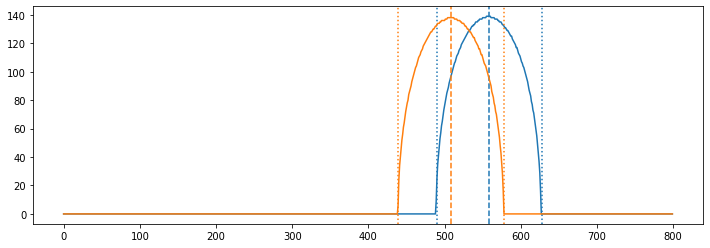

In [5]:
_, ax = plt.subplots(figsize=(12, 4))

ax.plot(gx)
ax.axvline(l, color='C0', ls=':')
ax.axvline(r, color='C0', ls=':')
ax.axvline(x0, color='C0', ls='--')

ax.plot(gy)
ax.axvline(t, color='C1', ls=':')
ax.axvline(b, color='C1', ls=':')
ax.axvline(y0, color='C1', ls='--');

## Plot the figure

In [6]:
ds, dl = img._corr_s, img._corr_l

ds, dl

(-99, -30)

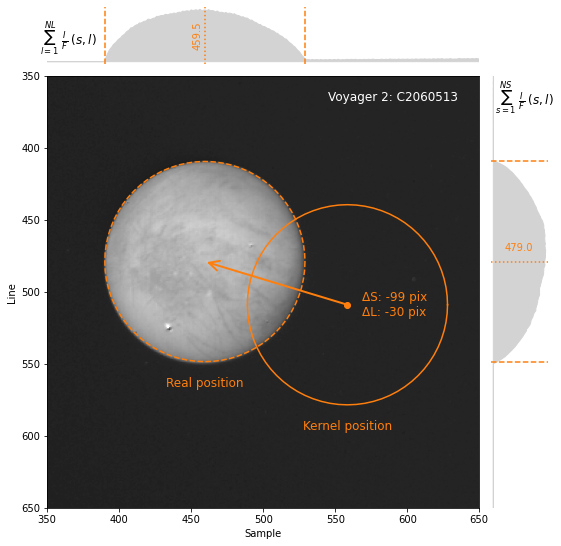

In [7]:
# definitions for the axes
left, width = 0.1, 0.75
bottom, height = 0.1, 0.75
bottom_h = left_h = left + width + 0.02

rect_img = [left, bottom, width, height]
rect_s = [left, bottom_h, width, 0.1]
rect_l = [left_h, bottom, 0.1, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

ax = plt.axes(rect_img)
axs = plt.axes(rect_s)
axl = plt.axes(rect_l)


ax.imshow(img.data, cmap='gray', extent=img.extent)

ax.plot(x0, y0, 'C1o')
ax.plot(cx0, cy0, 'C1-')

ax.plot(cx0 + ds, cy0 + dl, 'C1--')

ax.annotate('',
             xy=(x0, y0),
             xytext=(x0 + ds, y0 + dl),
             arrowprops=dict(
                 arrowstyle='<-, head_width=.5, head_length=1',
                 edgecolor='C1',
                 linewidth=2,
             ))

ax.set_xlabel('Sample')
ax.set_ylabel('Line')

ax.set_xlim(350, 650)
ax.set_ylim(650, 350)

ax.text(635, 365, f'{img.spacecraft_name}: {img.img_id}', va='center', ha='right', color='white', fontsize=12)
ax.text(x0, y0 + r0 + 15, 'Kernel position', va='center', ha='center', color='C1', fontsize=12)
ax.text(x0 + ds, y0 + r0 + 15 + dl, 'Real position', va='center', ha='center', color='C1', fontsize=12)
ax.text(x0 + 10, y0, f'ΔS: {ds:2d} pix\nΔL: {dl:2d} pix', va='center', ha='left', color='C1', fontsize=12)

# Sample histogram
axs.fill_between(np.arange(1, img.NS + 1),
                 np.zeros(img.NS),
                 np.clip(np.nansum(img.data, axis=0), 0, None),
                 color='lightgray')

axs.axvline(x0 + ds - r0, color='C1', ls='--')
axs.axvline(x0 + ds + r0, color='C1', ls='--')
axs.axvline(x0 + ds, color='C1', ls=':')

axs.text(x0 + ds - 5, 45, f'{x0 + ds:.1f}', va='center', ha='center', color='C1', rotation=90)

axs.text(350 + 15, 40, r'$\sum_{l=1}^{NL} \; \frac{I}{F} \; (s, l)$', va='center', ha='center', fontsize=12)
axs.set_xlim(350, 650)
axs.axis('off')

# Line histogram
axl.fill_betweenx(np.arange(1, img.NL + 1),
                  np.zeros(img.NL),
                  np.clip(np.nansum(img.data, axis=1), 0, None),
                  color='lightgray')

axl.axhline(y0 + dl - r0, color='C1', ls='--')
axl.axhline(y0 + dl + r0, color='C1', ls='--')
axl.axhline(y0 + dl, color='C1', ls=':')

axl.text(40, y0 + dl - 10, f'{y0 + dl:.1f}', va='center', ha='center', color='C1')

axl.text(50, 350 + 15, r'$\sum_{s=1}^{NS} \; \frac{I}{F} \; (s, l)$', va='center', ha='center', fontsize=12)
axl.set_ylim(650, 350)
axl.axis('off')

plt.savefig('Limb_centering.pdf', transparent=True, bbox_inches='tight', pad_inches=0);